In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_curve, roc_auc_score, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.svm import LinearSVC
import keras
from keras import layers
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('diabetes.csv')
target = 'diagnosed_diabetes'

In [48]:
X = df.drop(columns=[
    "diagnosed_diabetes",
    "diabetes_stage",])

In [49]:
y = df[target]

In [50]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [51]:
if len(cat_cols) > 0:
    X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=False)
else:
	X_enc = X.copy()

In [52]:
X_temp, X_test, y_temp, y_test = train_test_split(X_enc, y,test_size=0.10,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,test_size=0.22222)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [54]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [55]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [56]:
rf = RandomForestClassifier(
    n_estimators=5,
    max_depth=5,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
perceptron = SGDClassifier(
    loss="log_loss",
    learning_rate="constant",
    eta0=0.1,
    max_iter=20,
    random_state=42
)
perceptron.fit(X_train_scaled, y_train)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,20
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
svm = LinearSVC(max_iter=10000)
svm.fit(X_train_scaled, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


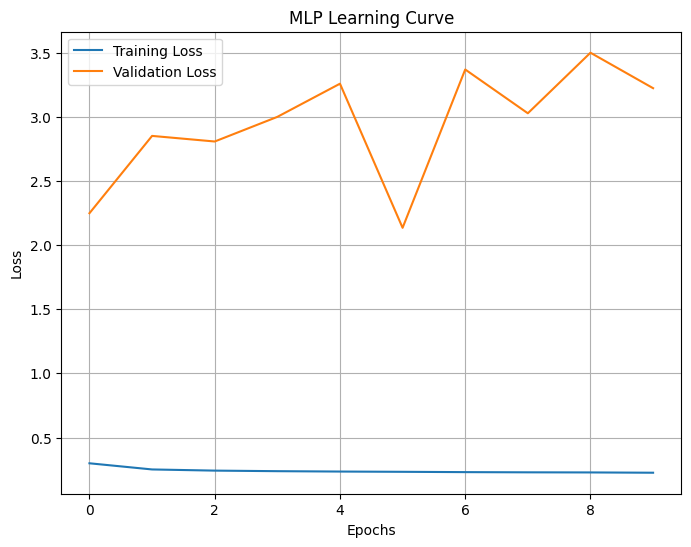

In [60]:
mlp = Sequential()
mlp.add(Dense(50, input_shape=(X_train.shape[1],), activation='tanh'))
mlp.add(Dense(100, activation='tanh'))
mlp.add(Dense(1, activation='sigmoid'))

mlp.compile(
    optimizer=SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_mlp = mlp.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    verbose=0
)

plt.figure(figsize=(8,6))
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.8921 - loss: 0.2647 - val_accuracy: 0.9050 - val_loss: 0.2430
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9110 - loss: 0.2298 - val_accuracy: 0.9132 - val_loss: 0.2269
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9143 - loss: 0.2229 - val_accuracy: 0.9136 - val_loss: 0.2285
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9161 - loss: 0.2197 - val_accuracy: 0.9156 - val_loss: 0.2235
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9163 - loss: 0.2182 - val_accuracy: 0.9166 - val_loss: 0.2221
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9179 - loss: 0.2156 - val_accuracy: 0.9156 - val_loss: 0.2235
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9184 - loss: 0.2140 - val_accuracy: 0.9165 - val_loss: 0.2217
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9189 -

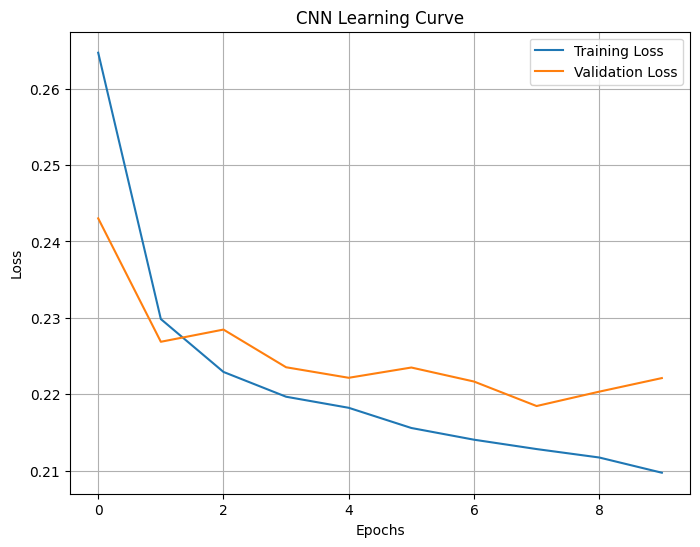

In [61]:
cnn_model = Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_cnn = cnn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(8,6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

--- Logistic Regression ---
Test accuracy: 0.8507
Precision: 0.8705921490352628
Recall: 0.8798117330643805
F1 Score: 0.8751776607307081
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      4051
           1       0.87      0.88      0.88      5949

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



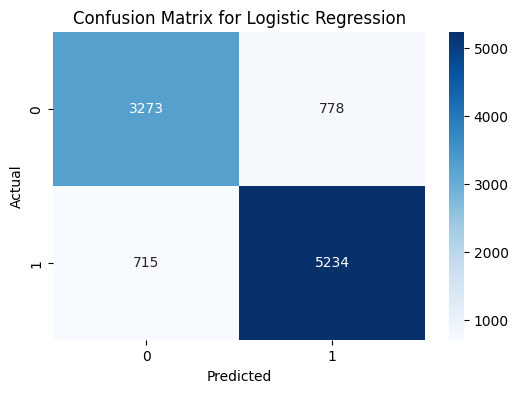

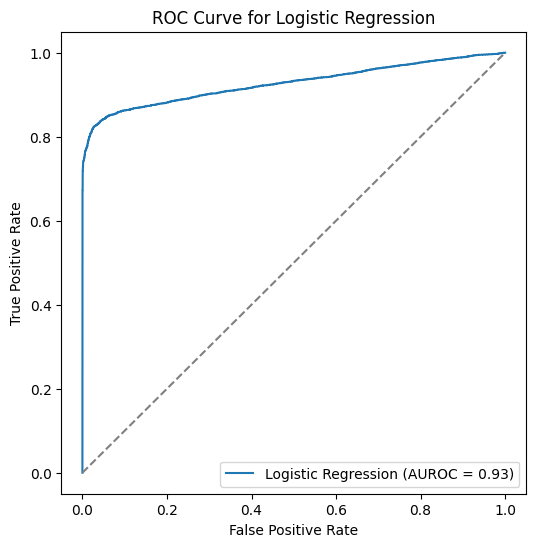

--- KNN ---
Test accuracy: 0.7433
Precision: 0.7837248322147651
Recall: 0.7851739788199698
F1 Score: 0.7844487362498951
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      4051
           1       0.78      0.79      0.78      5949

    accuracy                           0.74     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.74      0.74      0.74     10000



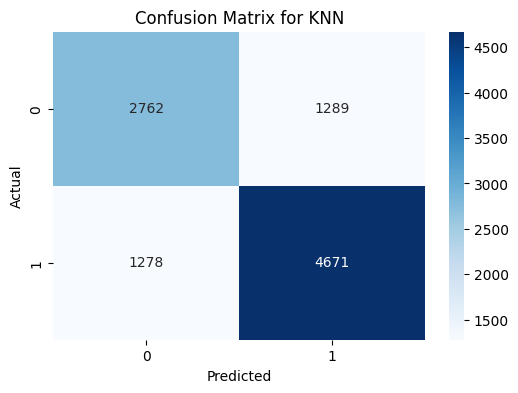

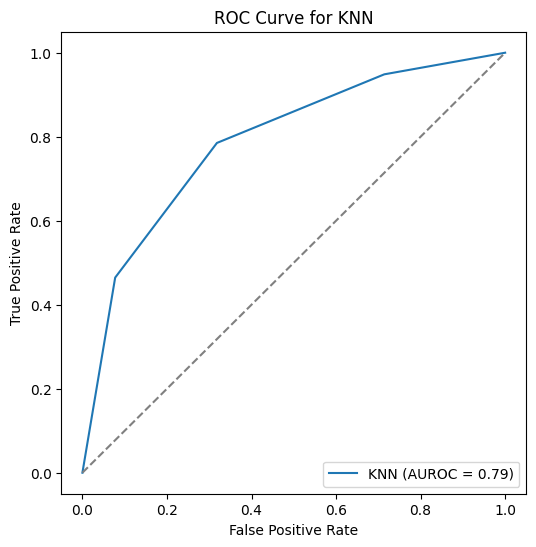

--- Random Forest ---
Test accuracy: 0.9
Precision: 0.975956914791306
Recall: 0.8529164565473188
F1 Score: 0.9102978112665949
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4051
           1       0.98      0.85      0.91      5949

    accuracy                           0.90     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.91      0.90      0.90     10000



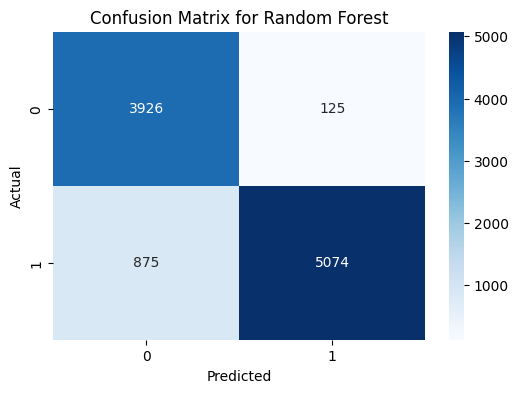

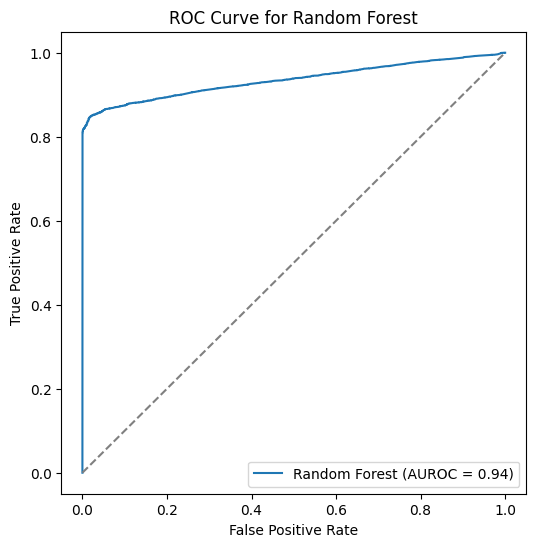

--- Perceptron ---
Test accuracy: 0.8135
Precision: 0.8540221914008321
Recall: 0.8280383257690368
F1 Score: 0.8408295638815396
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      4051
           1       0.85      0.83      0.84      5949

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



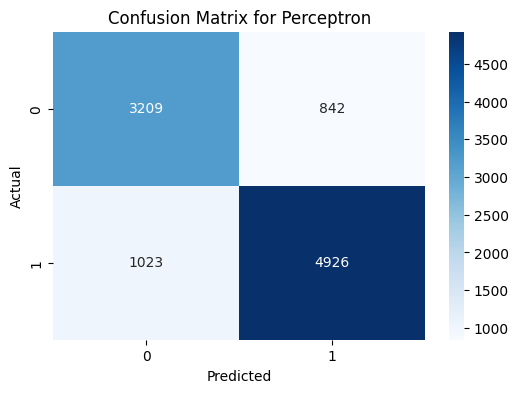

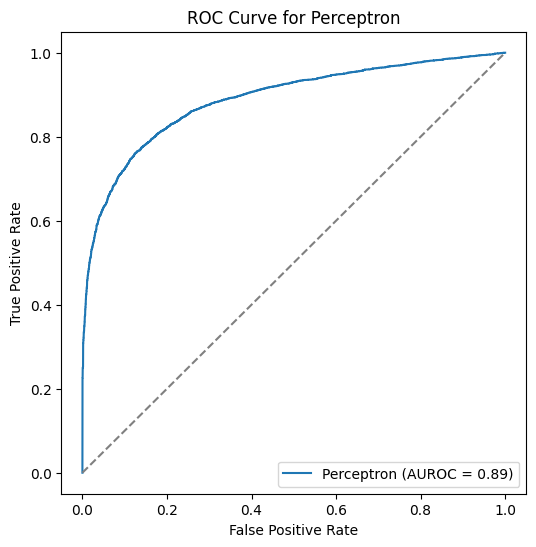

--- SVM ---
Test accuracy: 0.848
Precision: 0.8653687510311829
Recall: 0.8816607833249286
F1 Score: 0.8734388009991674
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4051
           1       0.87      0.88      0.87      5949

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



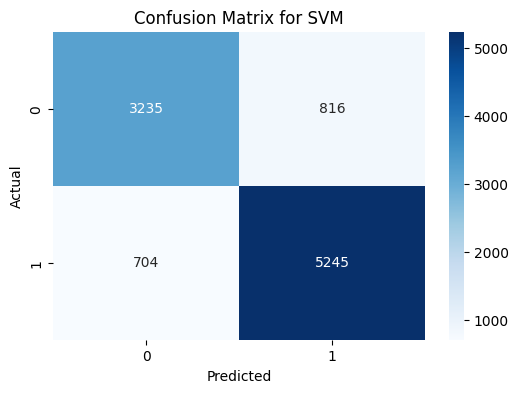

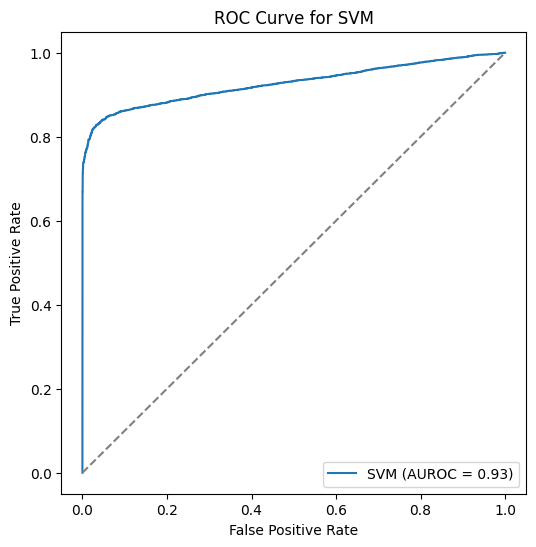

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- MLP ---
Test accuracy: 0.9016
Precision: 0.9797101449275363
Recall: 0.8522440746343923
F1 Score: 0.9115426105717368
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4051
           1       0.98      0.85      0.91      5949

    accuracy                           0.90     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.91      0.90      0.90     10000



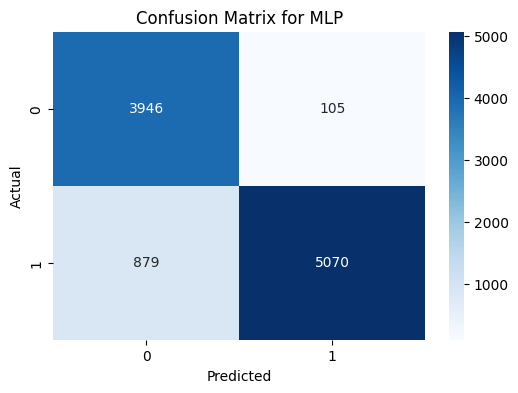

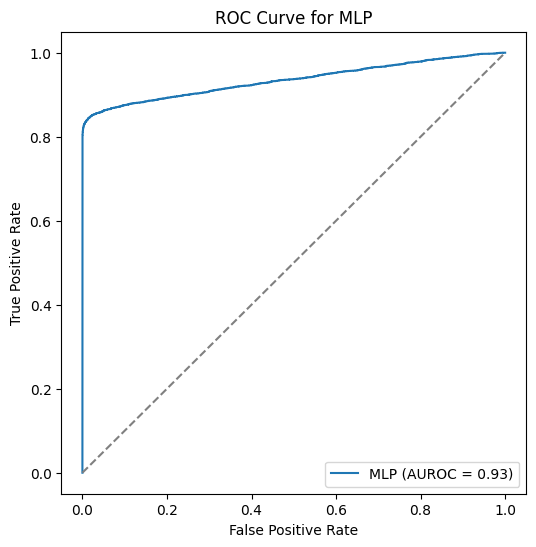

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
--- CNN ---
Test accuracy: 0.9093
Precision: 0.9885658914728682
Recall: 0.857455034459573
F1 Score: 0.918354487352597
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      4051
           1       0.99      0.86      0.92      5949

    accuracy                           0.91     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.92      0.91      0.91     10000



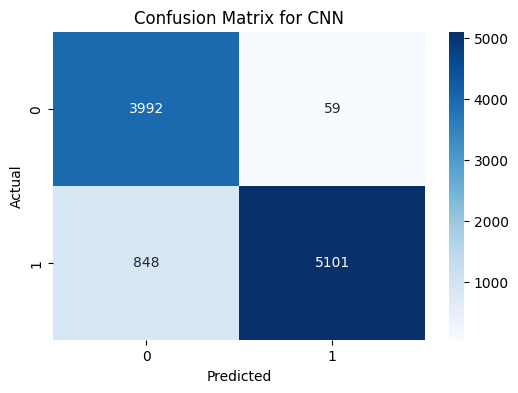

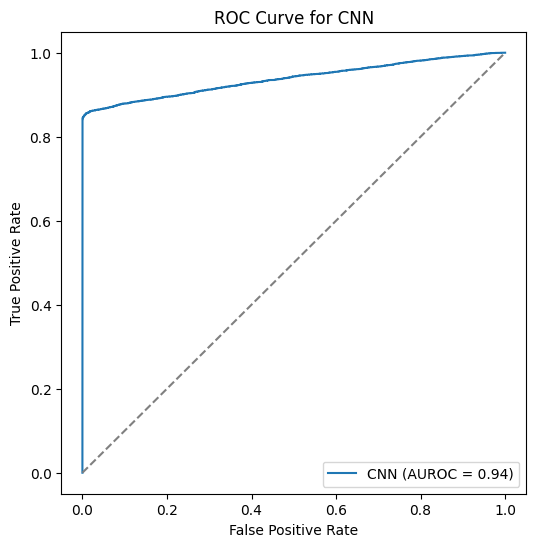

In [62]:
trained_models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Random Forest": rf,
    "Perceptron": perceptron,
    "SVM": svm,
    "MLP": mlp,
    "CNN": cnn_model
}

for name, model in trained_models.items():
    
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = svm.decision_function(X_test_scaled)

    if name == "MLP" or name == "CNN":
        y_prob = y_pred
        y_pred = (y_prob >= 0.5).astype(int)

    print(f"--- {name} ---")
    print("Test accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ---- Confusion Matrix Plot ----
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{name} (AUROC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
